## Оглавление:
1. Обработка пропусков
2. Анализ пропусков
3. Добавление данных в таблицу
4. Исследовательский анализ данных:
    - 4.1 Анализ параметров
    - 4.2 Анализ времени продажи квартиры
    - 4.3 Анализ факторов, влияющих на цену квартиры
    - 4.4 Анализ места продажи квартиры.
    - 4.5 Анализ предложения квартир
    - 4.6 Анализ сегмента "квартиры в центре"
5. Общий вывод










### 1. Обработка пропусков

Были поставлены следующие задачи:
- Добавить в таблицу: цену квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Изучить параметры: площадь, цена, число комнат, высота потолков.
- Выбрать 10 населённых пунктов с наибольшим числом объявлений.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv('/Users/artem/Desktop/Работы Юпитер/Проект 2 - Яндекс Недвижимость/real_estate_data.csv', sep='\t') #решаем через разделитель
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
data.info() # оценка количества пропусков по столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Определим список столбцов, критичных для дальнейшего исследования: в нашем случае это: 

- last_price (расчет цены кв/м)
- total_area (расчет цены кв/м)
- first_day_exposition - день недели, месяц и год публикации объявления - важен для последующего анализа
- floor - этаж - важен для последующего анализа
- floors_total - определяем, последний ли этаж
- living_area, kitchen_area - соотношение жилой и общей площади, а также отношение площади кухни к общей
- rooms - число комнат - важен для последующего анализа
- ceiling_height - высота потолков - важен для последующего анализа
- locality_name - расположение: критично для дальнейшего анализа

In [4]:
#data.info() # пропусков в столбце last_price нет, тип данных подходящий
data['last_price'].max() #763000000.0 - вопросов нет
data['last_price'].min() #12190.0 - явно занижено на три нуля - квартиры подобной площади стоят 12-13 миллионов, заменим значение
data.query('last_price == 12190.0')
data = data.query('last_price != 12190.0')
data['last_price'].min()
# в остальном минимумы объясняются неудачным расположением, площадью и тд

430000.0

In [6]:
data['floor'].value_counts() # аномалий (отрицательных, нулевых) нет
data['floor'].isna().mean() # пропусков нет

0.0

In [7]:
data['floors_total'].value_counts() #зачем-то указаны дробные числа, хотя этаж дробным быть не может
data['floors_total'].isna().sum() #3% пропусков
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()) # пропусков мало, заменим на медиану, чтобы не создавать в будущем проблем с нулевым значением 
data['floors_total'] = data['floors_total'].astype('int64')
#data.info() # замена успешна

In [8]:
#data.hist('living_area', bins=1000) # смотрим, как распределены площади. пики в районе 20-50кв.м понятны, но много близких к нулю значений. 
#data['living_area'].describe() # медиана равна 30.000000, минимальная площадь - 2 метра, вызывает вопрос
data.query('living_area < 10.000000').head(5)
# жилая площадь менее 10кв/м - ошибка, т.к значений всего 25, и находятся они в квартирах большой площади. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.4,2019-02-07T00:00:00,1,2.9,8,8.3,7,NaN,...,6.3,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
680,14,7200000.0,43.0,2017-10-31T00:00:00,1,NaN,8,9.0,2,NaN,...,23.0,NaN,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0
1326,8,8100000.0,52.0,2017-01-29T00:00:00,2,2.7,25,9.0,15,NaN,...,32.0,2.0,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0
2309,10,4200000.0,62.4,2017-06-15T00:00:00,2,2.6,9,8.4,6,NaN,...,41.0,2.0,посёлок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0


In [9]:
data['kitchen_area'].isna().mean() # 9,5% данных - пропуски. 
data['kitchen_area'].describe() # анализ данных, видно огромное максимальное значение 112 - для кухни это очень много
data.query('kitchen_area > 70') #интересная особенность - есть ошибки, где площадь кухни больше жилой площади квартиры
# обнаружились огромные квартиры (>400м) с кухнями по 100+ метров - предположим, что это пентхаузы, 
# целые этажи или коммерческие помещения
# заменим пропуски на медиану, чтобы не портить данные средней
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].isna().sum() #проверка

0

In [10]:
data['rooms'].describe() #минимальное значение - ноль, ошибка?
# data.info() #23699 общее количество значений по столбцу
data.query('rooms < 1')['rooms'].count() #195 нулевых значений, подсчитал через count().
#гипотеза - нули - это квартиры-комнаты, студии. могут быть любой площади, просто без перегородок, либо без возведенных перегородок
def roomer(row):
    if row == 0:
        row = row + 1
    return row
data['rooms'] = data['rooms'].apply(roomer)
data['rooms'].describe() #проверка

count    23698.000000
mean         2.078952
std          1.066219
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [11]:
data['ceiling_height'].isna().mean() #38.28% пропусков, значительная часть
data['ceiling_height'].describe() #минимальное =1, потолок 1 метр? 
# анализ планирую проводить по тем данным, что есть, т.к заменять на любое расчетное 
# значение почти 40% данных - дико
def ceiling_heighter(row):
    if row < 2.5:
        row = 2.5 # заменил с 2 на 2.5 по САНПИН
    if row > 5:
        row = data['ceiling_height'].median()
    return row
#data['ceiling_height'] = data['ceiling_height'].apply(ceiling_heighter) #замена нереального 1м потолка на медиану
data['ceiling_height'] = data['ceiling_height'].fillna(0)
data['ceiling_height'] = data['ceiling_height'].astype('float64')
#data.query('ceiling_height !=0')['ceiling_height'].apply(ceiling_heighter)
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_heighter)
data['ceiling_height'].describe() #проверка
# убрали нереальные максимумы и минимумы, в дальнейшем исследовании будем отсекать нули через query

count    23698.000000
mean         2.638034
std          0.238573
min          2.500000
25%          2.500000
50%          2.500000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [12]:
data['balcony'].value_counts() # есть нули, скорее всего - просто отсутствует балкон.
data['balcony'].isna().sum() # количество пропусков - 11519 / 48.6 процента от общего числа
#data['balcony'].isna().mean()
#если человек не указал число балконов — скорее всего, их нет. (c)
#заменяем пустые ячейки на нули
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum() #проверка
# расчет добавил только потому, что об этом прямо говорилось в описании задания.
# столбец балконы нам дальше не понадобится, работа ради работы

0

### 2. Анализ пропусков: 

- ceiling_height - критично для будущих расчетов, заменить на медиану либо 0 нельзя, скорее всего, люди просто ленятся заполнять этот параметр. Убрали нереальные максимумы и минимумы, в дальнейшем исследовании будем отсекать нули через query
- floors_total - незначительное количество пропусков, пропусков мало, заменил на медиану, чтобы не создавать в будущем проблем с нулевым значением.
- living_area - есть пропуски, вероятно влияющие на точность данных, т.к есть в дальнейшем задании. Нужно обработать. Ошибка в заполнении. 
- kitchen_area - есть пропуски, могут влиять на вывод, т.к используются в дальнейшем задании. 
- balcony - есть пропуски, столбец балконы нам дальше не понадобится;
- locality_name - есть пропуски, будет целиком обработан в дальнейшем.
- cityCenters_nearest - есть пропуски, аналогично locality_name.
- parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - пропуски есть, но на ход исследования не влияют
- days_exposition - 
- rooms - число комнат - важен для последующего анализа, убраны нули, заменены на 1. 

In [13]:
data['last_price'] = data['last_price'].astype('float32')
data['total_area'] = data['total_area'].astype('float32')
data['ceiling_height'] = data['ceiling_height'].astype('float32')
data['living_area'] = data['living_area'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')
data['balcony'] = data['balcony'].astype('float32')
data['airports_nearest'] = data['airports_nearest'].astype('float32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32')
data['parks_around3000'] = data['parks_around3000'].astype('float32')
data['parks_nearest'] = data['parks_nearest'].astype('float32')
data['ponds_around3000'] = data['ponds_around3000'].astype('float32')
data['ponds_nearest'] = data['ponds_nearest'].astype('float32')
data['days_exposition'] = data['days_exposition'].astype('float32')
#data.info()

### 3. Добавление данных в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [14]:
#цена за метр = стоимость/общая площадь
data['price_sm'] = data['last_price']/data['total_area'] #добавили стоимость за метр

data['first_day_exposition'].isna().sum() #0.0 процентов пропусков
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#вводим день недели, месяц и год
data['weekday'] = data['first_day_exposition'].dt.weekday 
#data['month'] = data['first_day_exposition'].astype('datetime64[M]') # попробовал новый метод
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#альтернативный способ 
data.loc[(data['floor'] == data['floors_total']), 'floor_name'] = 'последний'
data.loc[(data['floor'] == 1), 'floor_name'] = 'первый'
data['floor_name'] = data['floor_name'].fillna('другой')

#вводим соотношение жилой площади к общей:  
data['living_to_total_area'] = data['living_area']/data['total_area']
#вводим соотношение площади кухни к общей:  
data['kitchen_to_total_area'] = data['kitchen_area']/data['total_area']


data.head(5) # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sm,weekday,month,year,floor_name,living_to_total_area,kitchen_to_total_area
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.367188,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.50,11,18.600000,1,NaN,...,0.0,NaN,81.0,82920.789062,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.50,5,34.299999,4,NaN,...,2.0,574.0,558.0,92785.710938,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.50,14,NaN,9,NaN,...,3.0,234.0,424.0,408176.093750,4,7,2015,другой,NaN,0.057233
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


### 4. Исследовательский анализ данных:

#### 4.1 Анализ параметров
- Площадь
- Цена
- Число комнат 
- Высота потолков 

<AxesSubplot:>

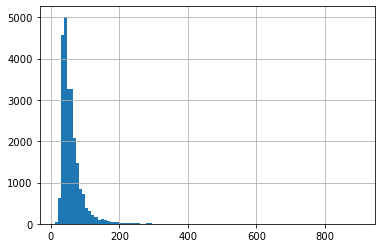

In [15]:
data['total_area'].describe()
data['total_area'].hist(bins=100) #распределение по площади близко к нормальному

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

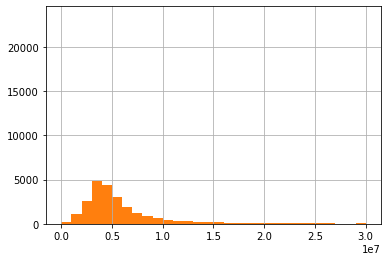

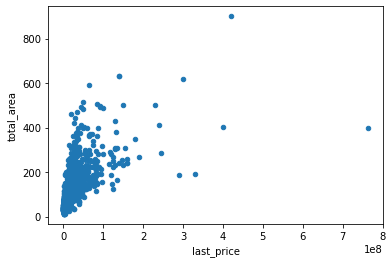

In [16]:
data['last_price'].describe() #цифры не очень читаемы
data['last_price_in_mil'] = data['last_price']/1000000
data['last_price_in_mil'].describe() #выбивается минимальное значение
data.sort_values('last_price').head(15) #визуально не сопоставить, где расположены объекты с такими ценами, не ясно, ошибка это или нет
df = pd.DataFrame(data=data, columns=['last_price', 'locality_name']) #создаем датафрейм для сопоставления
df.sort_values('last_price').head(15) #минимумы - цена за деревенские постройки, в принципе ничего криминального не видно
data['last_price_in_mil'].hist(bins=10, range=(1, 763.000000))

data['last_price'].hist(bins=30, range=(0, 30000000)) #цены выше 30 миллионов за квартиру начинают портить график
data['last_price'].median()
data.plot(x='last_price', y='total_area', kind='scatter') 

<AxesSubplot:>

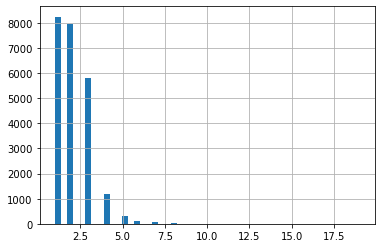

In [17]:
data['rooms'].describe()
data['rooms'].hist(bins=50) #с учетом того, что однокомнатных квартир всегда больше - график выглядит нормальным

<AxesSubplot:>

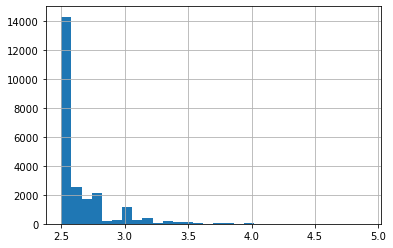

In [18]:
data['ceiling_height'].describe()
#data['ceiling_height'].hist(bins=100)
#data.plot(x='ceiling_height', y='ceiling_height', kind='scatter') # виден пик в 100м - явно ошибка
data.query('ceiling_height < 5')['ceiling_height'].hist(bins=30) # нормальное распределение, если отсечь ошибки

In [19]:
#анализ по количеству комнат
data['rooms'].value_counts()
data.query('rooms > 9') #квартиры как квартиры - огромная площадь, много комнат, высокие потолки. 
# На графике такие квартиры будут выбросами - они очень дорогие, очень большие и комнат в них больше чем в других. Значей очень мало, их проще удалить
data = data.query('rooms < 9')
data['rooms'].value_counts()

1    8244
2    7939
3    5814
4    1180
5     326
6     105
7      59
8      12
Name: rooms, dtype: int64

#### 4.2 Анализ времени продажи квартиры


42.000000     87
45.000000     84
60.000000     75
31.000000     73
32.000000     66
              ..
81.099998      1
237.000000     1
90.019997      1
122.300003     1
76.750000      1
Name: total_area, Length: 1149, dtype: int64

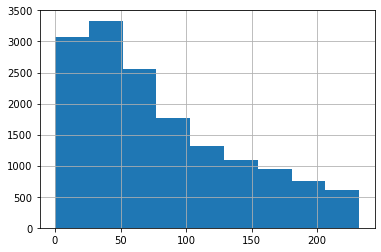

In [20]:
#data['days_exposition'].hist(bins=250)
#data['days_exposition'].median() #95.0 - обычно продажа занимает около 3 месяцев
#data['days_exposition'].mean() #180 дней в среднем
data['days_exposition'].describe() #минимум - единица, интересно - кому-то повезло за сутки продать квартиру
#list(data.sort_values(by='days_exposition',ascending=True)['days_exposition'].drop_duplicates()) #визуально определить максимумы и их распределение
data['days_exposition'].hist(bins=9, range=(0, 232)) #в принципе видно даже почти нормальное распределение, если убрать значения выше третьего квартиля - что вообще-то логично
data['days_exposition'].describe()
#print(data.corr()) # единственный параметр, с которым у дня продажи есть хоть какая-то связь - это год продажи: в какие-то годы люди активнее покупали квартиры, чем в иные
# вывод - время продажи распределено нормально, за исключением аномалий выше 232 дней
data.query('days_exposition>232').corr() #смотрим корреляцию высокого времени продажи с другими данными. ничего. 
data.query('days_exposition>232')['locality_name'].value_counts() #предположение, что долго продаются квартиры в захолустье. не оправдалось. 
data.query('days_exposition>232')['total_area'].value_counts() #предположение, что долго продаются квартиры огромной/мелкой площади. не оправдалось.

#### 4.3 Анализ факторов, влияющих на цену квартиры


In [21]:
#Какие факторы больше всего влияют на стоимость квартиры? 
#Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. 
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
#Также изучите зависимость от даты размещения: дня недели, месяца и года.

data['last_price'].describe()
data['last_price'].corr(data['total_area']) # 0.65 заметная связь площади с ценой
data['last_price'].corr(data['rooms']) # 0.36 связь не велика, можно сказать отсутствует
data['last_price'].corr(data['cityCenters_nearest'])# -0.20 отрицательная связь
#data.corr()['last_price'] # интересна свясь с ценой за кв.м, и с жилой площадью. в принципе - логично. 
#зависимости от дня недели, месяца и года - нет

-0.21112186724841453

                     last_price  price_sm  total_area     rooms  \
last_price             1.000000  0.750499    0.643577  0.358373   
price_sm               0.750499  1.000000    0.304315  0.055968   
total_area             0.643577  0.304315    1.000000  0.753564   
rooms                  0.358373  0.055968    0.753564  1.000000   
cityCenters_nearest   -0.211122 -0.318450   -0.233656 -0.186399   

                     cityCenters_nearest  
last_price                     -0.211122  
price_sm                       -0.318450  
total_area                     -0.233656  
rooms                          -0.186399  
cityCenters_nearest             1.000000  


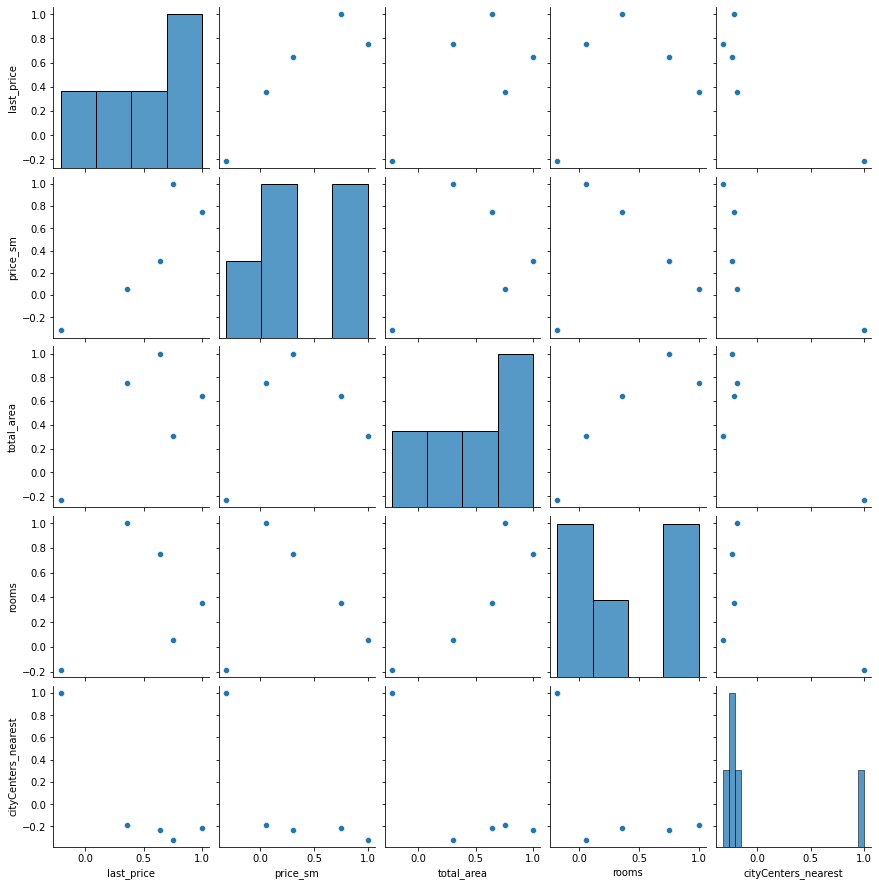

In [22]:
print(data[['last_price', 'price_sm', 'total_area', 'rooms', 'cityCenters_nearest']].corr())
# видим что цена зависит от общей площади и немного от количества комнат
sns.pairplot(data[['last_price', 'price_sm', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

In [23]:
#связь типа этажа и цены
data.columns
data.pivot_table(index='floor_name', values='last_price', aggfunc='median')
lpf = data.pivot_table(index='floor_name', values='last_price', aggfunc='median')['last_price'][1]
lpl = data.pivot_table(index='floor_name', values='last_price', aggfunc='median')['last_price'][2]
lpo = data.pivot_table(index='floor_name', values='last_price', aggfunc='median')['last_price'][0]
# видим, что разница в цене присутствует: 
print(f'Видим, что квартира на первом этаже в среднем стоит на {int((lpo/lpf)*100-100)} % дешевле, чем на "другом", а квартира на последнем - на {int((lpo/lpl)*100-100)}% дешевле, чем на другом')


Видим, что квартира на первом этаже в среднем стоит на 24 % дешевле, чем на "другом", а квартира на последнем - на 12% дешевле, чем на другом


<AxesSubplot:xlabel='year'>

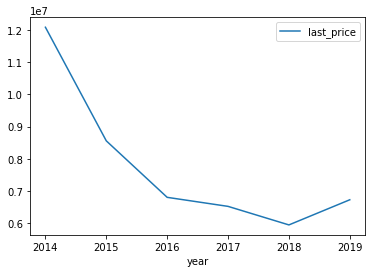

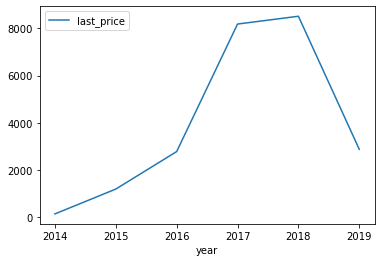

In [24]:
#связь года с ценой продажи
data.head(5)

#data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count']).reset_index().plot(x='year', y='last_price', kind='scatter')  # видим, что средняя цена в 2014 году максимальна
data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count']).reset_index() 
#видно, что в 2014 году количество сделок минимально, но их средняя - самая крупная из всех годов

# построим два графика, количество сделок и средняя их цена:
data.pivot_table(index='year', values='last_price', aggfunc='mean').reset_index().plot(x='year', y='last_price')
data.pivot_table(index='year', values='last_price', aggfunc='count').reset_index().plot(x='year', y='last_price')

# видно, что с годами жилье сильно дешевело, а количество сделок - росло
# соответственно, вывод - пусть и косвенно, но год влияет на стоимость продажи - отрицательно. 

<AxesSubplot:xlabel='month'>

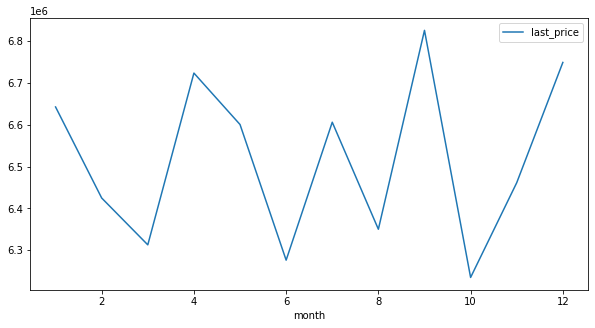

In [25]:
# связь конкретного месяца со средней ценой продажи
data.columns
data.pivot_table(index='month', values='last_price').plot(figsize=(10, 5))
# видим, что средняя цена колеблется: 
# январь-март: падение, нижняя точка - март
# март-апрель: рост до позиций января
# апрель-июнь: снова падение до уровня марта
# июнь-июль-август: незначительный отскок цены вверх с аналогичным паденим в августе
# август-сентябрь: резкий рост до максимального значения
# сентябрь-октябрь: резкий спад до минимума в течение года
# октябрь-декабрь: стабильный рост до около-январьского значения

<AxesSubplot:xlabel='month'>

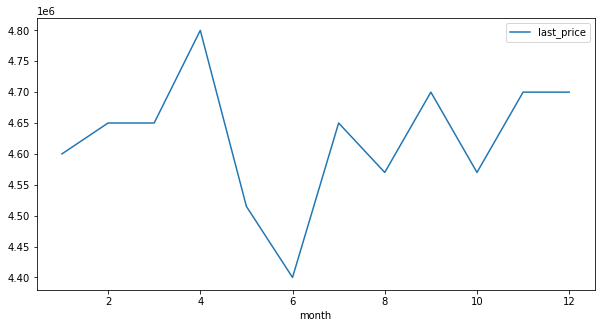

In [26]:
# проверим влияние месяца через медиану чтобы исключить выбросы 
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(figsize=(10, 5))
# в целом данные подтвердились, но график стал гораздо менее "скачущим", но при этом границы сдвинулись с 6,3-6,8млн до 4.4-4.8млн. 
# можно говорить, что самая низкая цена за год - в июне, самая высокая - в апреле, с некоторым отрывом - в сентябре. 

In [27]:
#опыт с анализом зависимости цены от высоты потолка
data['ceiling_height_index'] = data['ceiling_height'] # создаем копию столбца "высота потолка"

def ceiling_height_index(row): #в зависимости от высоты функция присваивает одно из 3 типовых обозначений в столбец "индекс высоты потолка"
    if row == 2.5:
        row = 'низкий';
    elif row > 2.5 and row <= 3:
        row = 'стандартный';
    elif row > 3:
        row = 'высокий';
    return row
data['ceiling_height_index'] = data['ceiling_height_index'].apply(ceiling_height_index)

data.pivot_table(index='ceiling_height_index', values='last_price', aggfunc='median') #раньше тут была функция mean, но я решил избавиться от сильного влияния выбросов, поэтому медиана
#видим что разница в медианной цене квартиры с потолком >3 метров разница почти в два раза выше, в сравнении с ценами за стандартный и низкий потолки.
h = data.pivot_table(index='ceiling_height_index', values='last_price', aggfunc='median').reset_index()['last_price'][0]
l = data.pivot_table(index='ceiling_height_index', values='last_price', aggfunc='median').reset_index()['last_price'][1]
s= data.pivot_table(index='ceiling_height_index', values='last_price', aggfunc='median').reset_index()['last_price'][2]

print(f'Видим, что квартира с "высоким" потолком на {int((h/s)*100-100)}% выше, чем со "стандартным.') #
print(f'Квартира с низким потолком на {int(100-(l/s)*100)}% дешевле, чем квартира со стандартной высотой потолка')

Видим, что квартира с "высоким" потолком на 94% выше, чем со "стандартным.
Квартира с низким потолком на 17% дешевле, чем квартира со стандартной высотой потолка


#### 4.4 Анализ места продажи квартиры.


In [28]:
# Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
# Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце
data.pivot_table(index='locality_name',values='price_sm', aggfunc=['mean', 'count']).sort_values([('count','price_sm')], ascending=False).head(10)

#в нашем случае минимальное и максимальные значения находятся на последнем и первом местах соответственно, так уж вышло

,mean,count
,price_sm,price_sm
locality_name,,
Санкт-Петербург,114845.390625,15701
посёлок Мурино,85752.187500,522
посёлок Шушары,78677.367188,440
Всеволожск,68654.476562,398
Пушкин,103125.820312,369
Колпино,75424.578125,338
посёлок Парголово,90175.914062,327
Гатчина,68746.148438,307


#### 4.5 Анализ предложения квартир

- Выделить квартиры в Санкт-Петербурге. 
- Определить, какая область входит в центр. 
- Определить среднюю цену для каждого километра. 
- Определить "центральную зону".

array([[<AxesSubplot:title={'center':'last_price_in_mil'}>]], dtype=object)

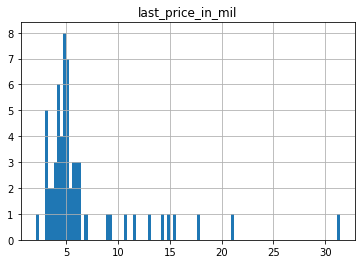

In [29]:
data.head(15)
data_cityCenters_nearest = pd.DataFrame(data=data, columns=('last_price', 'cityCenters_nearest', 'locality_name', 'last_price_in_mil', 'total_area', 'rooms', 'ceiling_height', 'first_day_exposition', 'year', 'month'))
data_cityCenters_nearest['cityCenters_nearest'].isna().sum() #пропуски удалим, потому что медианой/средней их не заполнишь
data_cityCenters_nearest = data_cityCenters_nearest.dropna(subset=['cityCenters_nearest'], how='any', axis=0)
data_cityCenters_nearest['range_in_km'] = (data_cityCenters_nearest['cityCenters_nearest']/1000).round() #хотя изначально я округлил через int(), это ведь допустимо???
data_cityCenters_nearest.pivot_table(index='range_in_km', values='last_price_in_mil', sort=True).head(20) #анализируем цифры
data_cityCenters_nearest.pivot_table(index='range_in_km', values='last_price_in_mil', sort=True).hist(bins=100) #визуализация, явно пик на 7км
# 7 километров от центра - дальше идет резкий спад в стоимости средней цены квартир почти на 4млн 

#### 4.6 Анализ сегмента "квартиры в центре".
- Выделить сегмент квартир в центре. 
- Проанализировать эту территорию и следующие параметры: площадь, цена, число комнат, высота потолков. 
- Определить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
- Вывод.

In [30]:
#data_cityCenters_nearest.query('range_in_km <= 7').pivot_table(index='last_price_in_mil', values='total_area', sort=False)
data_cityCenters_nearest.query('range_in_km <= 7').corr()
data_ceiling_height = data_cityCenters_nearest.dropna(subset=['ceiling_height'], axis=0)
data_cityCenters_nearest.query('range_in_km <= 7').sort_values('last_price', ascending=False).head(20)
data_cityCenters_nearest.query('range_in_km <= 7')['last_price_in_mil'].describe() #14.500000 - третий квартиль
data_cityCenters_nearest.query('last_price_in_mil > 14.500000') #1294 значения

,last_price,cityCenters_nearest,locality_name,last_price_in_mil,total_area,rooms,ceiling_height,first_day_exposition,year,month,range_in_km
3,64900000.0,6800.0,Санкт-Петербург,64.900000,159.000000,3,2.50,2015-07-24,2015,7,7.0
35,15500000.0,3502.0,Санкт-Петербург,15.500000,149.000000,5,2.50,2017-06-26,2017,6,4.0
42,22000000.0,30605.0,Петергоф,22.000000,161.800003,4,2.80,2015-07-08,2015,7,31.0
51,45000000.0,6589.0,Санкт-Петербург,45.000000,161.000000,3,3.20,2017-10-17,2017,10,7.0
63,20000000.0,4800.0,Санкт-Петербург,20.000000,118.000000,3,3.00,2018-09-11,2018,9,5.0
...,...,...,...,...,...,...,...,...,...,...,...
23555,15350000.0,3088.0,Санкт-Петербург,15.350000,158.500000,7,2.95,2019-03-07,2019,3,3.0
23574,64990000.0,5975.0,Санкт-Петербург,64.990000,139.000000,3,3.00,2015-11-24,2015,11,6.0
23590,21187872.0,4529.0,Санкт-Петербург,21.187872,123.300003,3,2.50,2017-04-25,2017,4,5.0
23631,14799000.0,13944.0,Санкт-Петербург,14.799000,104.000000,3,3.10,2018-11-18,2018,11,14.0


In [31]:
# Проанализировать эту территорию и следующие параметры: площадь и цена. 

data_cityCenters_nearest[['last_price', 'total_area']].corr() # связь цены и количества метров очевидна, проверяем через корреляцию

,last_price,total_area
last_price,1.000000,0.641529
total_area,0.641529,1.000000


<AxesSubplot:xlabel='rooms'>

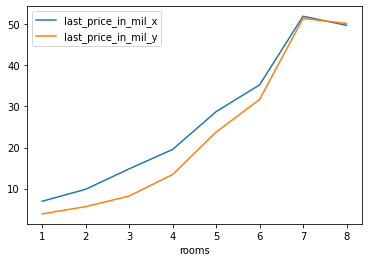

In [32]:
# число комнат
realty_in_center = data_cityCenters_nearest.query('range_in_km <= 7') # создадим новый фрейм для работы только с квартирами в центре

# связь количества комнат с ценой по общему датафрейму и только по квартирам в центре:
realty_in_center.pivot_table(index='rooms', values='last_price_in_mil').merge(data.pivot_table(index='rooms', values='last_price_in_mil'), on='rooms').plot()
# видно что цена в зависимости от количества комнат растет в одинаковой пропорции как для квартир в центре, так и для остальных. Зависимость везде прямая. 

<AxesSubplot:xlabel='ceiling_height'>

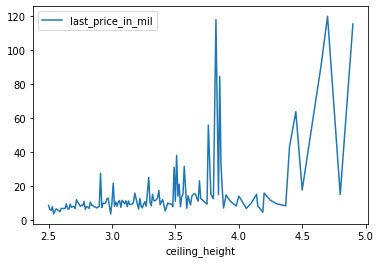

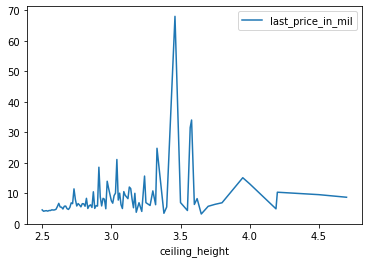

In [33]:
# связь высоты потолка с ценой по общему датафрейму и только по квартирам в центре:

data_cityCenters_nearest.query('range_in_km <= 7').pivot_table(index='ceiling_height', values='last_price_in_mil', aggfunc='median').plot()  #связь высоты потолка с ценой квартиры

data.query('cityCenters_nearest > 7000').pivot_table(index='ceiling_height', values='last_price_in_mil', aggfunc='median').plot()

# цена в зависимости от высоты потолка имеет явные пики ближе к 4 метрам в центре и около 2.9-3м в остальных вариантах. 
# вывод - в центре люди платят за высокие потолки чаще и охотнее, что в целом логично для Петербурга - исторические здания, большие окна, высокие потолки. 

<AxesSubplot:xlabel='year'>

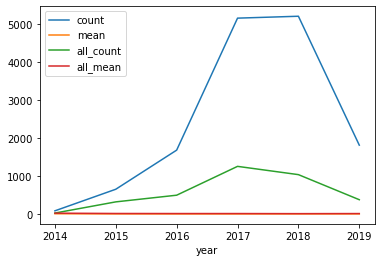

In [34]:
data_cityCenters_nearest.query('range_in_km <= 7').pivot_table(index='year', values='last_price_in_mil').sort_values('last_price_in_mil', ascending=False)
# видно что средняя цена объекта в центре с годами лишь падает. Странно. 
# Нам наоборот отовсюду говорят, что недвижимость только дорожает, а тут средняя цена сделки наоборот падает. 

df_1=data_cityCenters_nearest.query('range_in_km <= 7').pivot_table(index='year', values='last_price_in_mil', aggfunc=('mean', 'count'), sort=True)
# проверяем, смотрим на среднее количество сделок с недвижимостью в центре по годам
# видим, что был пик спроса в 2017 годах, и резкий провал в 2019
# проверим, как было с остальной частью рынка недвижимости
df_2=data_cityCenters_nearest.query('range_in_km > 7').pivot_table(index='year', values='last_price_in_mil', aggfunc=('mean', 'count'), sort=True)
# видим что спад в 2019 году был во всей отрасли - надо смотреть, какие события были в городе, стране и мире, которые привели к такому
df_2['all_count']=df_1['count']
df_2['all_mean']=df_1['mean']
df_2.sort_values(by='year').plot() # видно что тенденция везде одна - рост количества сделок с 2016 по 2017 и их спад с 2018 по 2019
# что точно влияет на стоимость и количество продаж - так это расположение. 
# В Санкт-Петербурге количество сделок и цена квартир на порядок выше, чем в области. 

In [35]:
data_cityCenters_nearest.pivot_table(index='year', values='last_price_in_mil', aggfunc=('mean', 'count'), sort=True)

,count,mean
year,,
2014,115,13.774813
2015,979,9.724753
2016,2186,7.820909
2017,6425,7.453797
2018,6257,6.971809
2019,2198,7.716481


count    323.000000
mean      17.050341
std       22.658400
min        3.299000
25%        6.975000
50%       10.150000
75%       15.650000
max      180.000000
Name: last_price_in_mil, dtype: float64

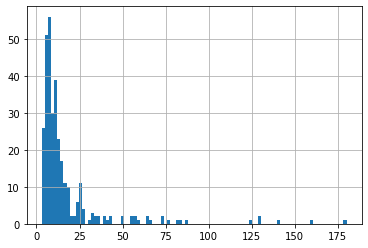

In [36]:
data_cityCenters_nearest.query('year == 2015 and range_in_km <= 7').sort_values('last_price_in_mil', ascending=False)['last_price_in_mil'].hist(bins=100)
data_cityCenters_nearest.query('year == 2015 and range_in_km <= 7')['last_price_in_mil'].describe()

In [37]:
print(data_cityCenters_nearest.query('range_in_km <= 7')['total_area'].describe())
print(data_cityCenters_nearest.query('range_in_km >= 7')['total_area'].describe())

# в центре в среднем продаются квартиры большей площади, чем не в центре

count    3530.000000
mean       92.488663
std        57.997486
min        12.000000
25%        56.925001
50%        78.599998
75%       109.924999
max       631.200012
Name: total_area, dtype: float64
count    15050.000000
mean        56.707794
std         27.240557
min         13.000000
25%         39.900002
50%         50.000000
75%         66.000000
max        494.100006
Name: total_area, dtype: float64


In [38]:
print(data_cityCenters_nearest.query('range_in_km <= 7')['last_price_in_mil'].describe())
print(data_cityCenters_nearest.query('range_in_km >= 7')['last_price_in_mil'].describe())

#в среднем в центре объект в 2 раза дороже, чем в остальных областях, связано с пиками - ультра-дорогим жильем большой площади

count    3530.000000
mean       14.806720
std        24.251949
min         1.600000
25%         6.650000
50%         9.195000
75%        14.375000
max       763.000000
Name: last_price_in_mil, dtype: float64
count    15050.000000
mean         6.020802
std          4.795817
min          1.190000
25%          3.850000
50%          4.850000
75%          6.500000
max        135.000000
Name: last_price_in_mil, dtype: float64


In [39]:
print(data_cityCenters_nearest.query('range_in_km <= 7')['rooms'].describe())
print(data_cityCenters_nearest.query('range_in_km >= 7')['rooms'].describe())
#количество комнат по объектам примерно одинаково распределено

count    3530.000000
mean        2.810765
std         1.333951
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: rooms, dtype: float64
count    15050.000000
mean         1.986578
std          0.931264
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64


#### 5. Общий вывод



От заказчика была получена таблица с данными, описывающими продажу недвижимости в городе Санкт-Петербурге и области за 2014-2019 годы для анализа и поставлена следующая задача: установить параметры, влияющие на цену объекта недвижимости.

Дополнительно были поставлены локальные задачи: 
 - цену квадратного метра;
 - день недели, месяц и год публикации объявления;
 - этаж квартиры; варианты — первый, последний, другой;
 - соотношение жилой и общей площади, а также отношение площади кухни к общей;
 - изучить параметры: площадь, цена, число комнат, высота потолков;
 - определить факторы, которые больше всего влияют на стоимость квартиры;
 - отобрать и проанализировать 10 населённых пунктов с наибольшим числом объявлений; 
 - выделить и проанализировать квартиры в центре Санкт-Петербурга; 
 

Таблица содержит следующие столбцы: 'total_images', 'last_price', 'total_area', 'first_day_exposition','rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor','is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_sm', 'weekday', 'month', 'year', 'floor_name','living_to_total_area', 'kitchen_to_total_area','last_price_in_mil', 'ceiling_height_index'. 

Для работы по определению параметров были отобраны и проанализированы следующие столбцы: 
- last_price: важен для расчета цены кв/м;
- total_area: важен для расчета цены кв/м;
- first_day_exposition - день недели, месяц и год публикации объявления - важен для последующего анализа;
- floor - этаж - важен для последующего анализа и решения локальной задачи;
- floors_total - важен для определения, последний ли этаж;
- living_area, kitchen_area - важны для расчета соотношения жилой и общей площади, а также отношение площади кухни к общей;
- rooms - число комнат - важен для последующего анализа;
- ceiling_height - высота потолков - важен для последующего анализа;
- locality_name - расположение: критично для дальнейшего анализа;

В процессе анализа отдельных столбцов были выявлены следующие аномалии и ошибки: 
- столбец last_price: ошибочное минимальное значение, в дальнейшем анализе будет выбросом. Значение удалено. 
- столбец floors_total: указаны дробные числа, хотя этаж дробным быть не может. Приведены к целочисленным значениям. Также обнаружены 3% пропусков, заменены на медиану. 
- столбец kitchen_area: пропуски, замена произведена на медиану; 
- столбец rooms: некоторое количество нулевых значений, заменены медианным значением; 
- столбец ceiling_height: большое количество пропусков, много значений меньше минимально возможной высоты потолка. Заменены на медиану и 2.5м соответственно. 

В процессе решения локальных задач были добавлены следующие столбцы: 
- цена за квадратный метр: price_sm;
- день недели, месяц и год публикации объявления: 'weekday', 'month', 'year';
- этаж квартиры; варианты — первый, последний, другой: floor_name;
- соотношение жилой и общей площади, а также отношение площади кухни к общей: 'living_to_total_area', 'kitchen_to_total_area';

Был проведен анализ данных, показавших следующее: 
- анализ площади квартир показал, что, за исключением редких выбросов, распределение близко к нормальному, а значит, выборка соответствует действительности; 
- анализ цен на недвижимость показал, что, несмотря на наличие экстремальных минимумов и максимумов это не ошибки базы, а реальные предложения. Цены объясняются расположением, площадью, уникальностью самих объектов.
- были обнаружены аномалии в столбце rooms, квартиры с количеством комнат более 9 было решено удалить по следующим причинам: недвижимость очень дорогая, будет выбросом на любом графике; количество комнат нереалистично большое - больше 10, это показатели загородных домов, что может быть ошибкой. 
- высоты потолков после предобработки распределены нормально, без явных выбросов и аномалий; 
- анализ столбца days_exposition показал, что обычно продажа занимает около 3 месяцев (или 180 дней) в среднем. Есть интересный случай, когда кому-то повезло за сутки продать квартиру; 

Далее, был проведен анализ факторов, влияющих на цену квартиры, показавший следующее: 
- напрямую цена зависит от общей площади, несколько слабее - от количества комнат. Это достаточно очевидный факт; 
- обнаружена связь между этажом и ценой: квартира на первом этаже в среднем стоит на 24 % дешевле, чем на "другом", а квартира на последнем - на 12% дешевле, чем на "другом";
- связь года продажи и стоимости нельзя назвать однозначной:  с годами жилье сильно дешевело, а количество сделок - росло; соответственно, вывод - пусть и косвенно, но год влияет на стоимость продажи - отрицательно. Однако, ввиду того, что год - не количественная и не качественная характеристика, нельзя сказать, что она объективно влияет на стоимость. Мы не можем продавать квартиру дороже лишь потому, что "мы ее покупали в 2014 году, когда цена была максимальна"; в 2019 году был резкий спад продаж во всей таблице - для понимания, нужно смотреть, какие события внутри страны, города, могли этому способствовать.
- с зависимостью цены от месяца следующая: можно говорить, что самая низкая цена за год - в июне, самая высокая - в апреле, с некоторым отрывом - в сентябре. Возможны уже какие-то выводы, так как продавать квартиру в апреле - выгоднее всего; 
- в зависимости от высоты потолка можно сделать вывод, что цена на квартиры с "высоким" потолком на 94% выше, чем со "стандартным. Квартира с низким потолком на 17% дешевле, чем квартира со стандартной высотой потолка. Стандартным приняли высоту от 2.5 до 3 метров, низким - 2.5 (ниже после предобработки высоты в базе нет), а высоким - выше 3 метров. Наиболее дорогими оказались объявления с высотой от 3 метров - конечно, тут влияют и исторические дома в центре, и просто дорогие дома, но логически это обосновано: высокий потолок всегда стоит дороже низкого; 

По количеству объявлений и по средней цене недвижимости однозначным лидером является город Санкт-Петербург. 

- Имеется явный и очевидный перекос в большую сторону по геолокации - в городе объявлений больше, чем в области.
- в Санкт-Петербурге количество сделок и цена квартир на порядок выше, чем в области.
- В среднем, в центре Санкт-Петербурга объект стоит в 2 раза дороже, чем в остальных областях, связано это с пиками - ультра-дорогим жильем большой площади. "Центром" люди считают зону радиусом 7км от исторического центра города, дальше объекты резко дешевеют. 
- "внутри" центра города на жилье влияют те же факторы, что и в остальном городе/области: площадь, количество комнат, высота потолка. Распределение в целом аналогично. 

По итогу анализа можно сказать, что основными параметрами, влияющими на стоимость продажи, являются: 
- площадь
- количество комнат
- высота потолка
- этаж, на котором находится квартира
- расположение, город или область, центр или окраина;

В связи с этим, можно сделать осторожный вывод, что, раз эти показатели являются "основными", то можно попробовать сделать лайт-версию сервиса, либо в самом сервисе сделать надстройку-фильтр (кнопка "найди мне то, что мне надо"), учитывающую только эти параметры.
Таким образом, пользователям в своей массе не придется тратить время на поиск в списках среди "близости к паркам", "близости к прудам", и так далее. 
